# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Declare Variables for future use
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
iCount = 0
setCount = 1

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list
for index, city in enumerate(cities, start = 1):
    try:
        #Get a request from the API
        response = requests.get(query_url + city).json()
        
        #Append data to each corresponding list from the API
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        #Break up processing in sets of 50 for easier reading of output
        #Checks if the ICount is less than 50, if it is, keep incrementing
        if iCount > 49:
            iCount = 0
            setCount += 1
        #Once the iCount is above 50, create a new set and continue grouping records by 50 again
        else:
            iCount += 1
            
        print(f"Processing index: {iCount} Set: {setCount} : {city}") 
    
    #Excepetion error when no city was found when pullling data from the API
    except(KeyError, IndexError):
        print("City not found")

Processing index: 1 Set: 1 : zaozerne
Processing index: 2 Set: 1 : ushuaia
Processing index: 3 Set: 1 : mar del plata
Processing index: 4 Set: 1 : barrow
Processing index: 5 Set: 1 : rikitea
Processing index: 6 Set: 1 : thinadhoo
Processing index: 7 Set: 1 : qaanaaq
Processing index: 8 Set: 1 : victoria
City not found
Processing index: 9 Set: 1 : punta arenas
Processing index: 10 Set: 1 : puerto ayora
Processing index: 11 Set: 1 : coos bay
Processing index: 12 Set: 1 : ocampo
Processing index: 13 Set: 1 : khatanga
Processing index: 14 Set: 1 : luanda
Processing index: 15 Set: 1 : taldan
Processing index: 16 Set: 1 : san giovanni in fiore
Processing index: 17 Set: 1 : new norfolk
Processing index: 18 Set: 1 : craigieburn
Processing index: 19 Set: 1 : houma
Processing index: 20 Set: 1 : nantucket
Processing index: 21 Set: 1 : mataura
Processing index: 22 Set: 1 : port alfred
Processing index: 23 Set: 1 : calama
City not found
Processing index: 24 Set: 1 : albany
Processing index: 25 Set:

Processing index: 1 Set: 5 : mikhaylovka
Processing index: 2 Set: 5 : ciudad bolivar
Processing index: 3 Set: 5 : paamiut
Processing index: 4 Set: 5 : arica
Processing index: 5 Set: 5 : hilo
Processing index: 6 Set: 5 : bathsheba
Processing index: 7 Set: 5 : tokat
City not found
Processing index: 8 Set: 5 : asau
Processing index: 9 Set: 5 : togur
City not found
Processing index: 10 Set: 5 : half moon bay
Processing index: 11 Set: 5 : mweka
Processing index: 12 Set: 5 : longyearbyen
Processing index: 13 Set: 5 : alofi
City not found
Processing index: 14 Set: 5 : namatanai
Processing index: 15 Set: 5 : joshimath
Processing index: 16 Set: 5 : cherskiy
Processing index: 17 Set: 5 : parker
City not found
Processing index: 18 Set: 5 : byron bay
City not found
Processing index: 19 Set: 5 : saint-augustin
Processing index: 20 Set: 5 : bosaso
Processing index: 21 Set: 5 : izmit
Processing index: 22 Set: 5 : pinega
Processing index: 23 Set: 5 : singaraja
Processing index: 24 Set: 5 : mayumba
Pro

Processing index: 0 Set: 9 : qaqortoq
Processing index: 1 Set: 9 : takoradi
Processing index: 2 Set: 9 : kamenka
City not found
Processing index: 3 Set: 9 : kudahuvadhoo
City not found
Processing index: 4 Set: 9 : rawson
Processing index: 5 Set: 9 : almaznyy
City not found
Processing index: 6 Set: 9 : grand-santi
Processing index: 7 Set: 9 : moshi
Processing index: 8 Set: 9 : venice
Processing index: 9 Set: 9 : waw
Processing index: 10 Set: 9 : iskateley
Processing index: 11 Set: 9 : san juan de aznalfarache
Processing index: 12 Set: 9 : kindia
Processing index: 13 Set: 9 : joensuu
Processing index: 14 Set: 9 : yavaros
Processing index: 15 Set: 9 : san ignacio
Processing index: 16 Set: 9 : santiago de cuba
Processing index: 17 Set: 9 : samara
Processing index: 18 Set: 9 : jutai
Processing index: 19 Set: 9 : san martin
Processing index: 20 Set: 9 : smithers
City not found
Processing index: 21 Set: 9 : kilcullen
Processing index: 22 Set: 9 : natal
Processing index: 23 Set: 9 : talcahuano

## Convert Raw Data to DataFrame
* Save as csv

In [5]:
#Convert data appended to lists, into a single dataframe for easier manipulation
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

weather_df.head()

#Come back later and re-format the "Date" Column

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Zaozyornoye,0,UA,1603247396,57,45.16,33.28,51.89,8.52
1,Ushuaia,40,AR,1603247225,75,-54.80,-68.30,41.00,4.85
2,Mar del Plata,0,AR,1603247273,87,-38.00,-57.56,52.00,5.82
3,Barrow,90,US,1603246997,86,71.29,-156.79,28.40,12.75
4,Rikitea,24,PF,1603247226,75,-23.12,-134.97,74.08,9.31


In [6]:
#Save the new dataframe into a csv file
weather_df.to_csv(output_data_file, index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

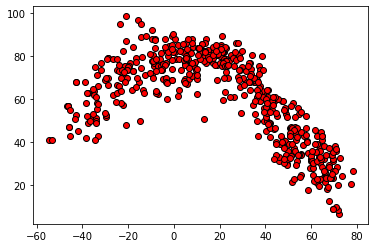

In [7]:
#Create a scatter plot, comparing Lat(x_axis) and Max Temp (y_axis)
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "red", edgecolor = "black")

plt.savefig("Images/City_Latitude_VS_Temperature.png")

### Latitude vs. Humidity Plot

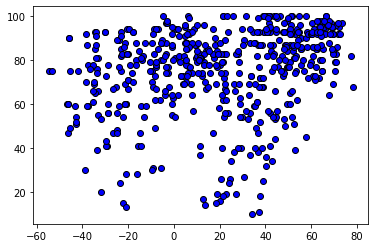

In [8]:
#Create a scatter plot, comparing Lat(x_axis) and Humidity (y_axis)
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "blue", edgecolor = "black")

plt.savefig("Images/City_Latitude_VS_Humidity.png")

### Latitude vs. Cloudiness Plot

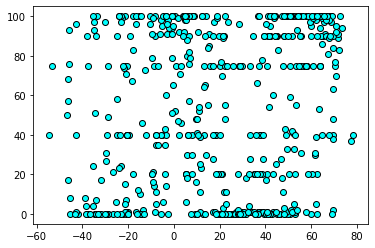

In [9]:
#Create a scatter plot, comparing Lat(x_axis) and Cloudiness (y_axis)
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "cyan", edgecolor = "black")

plt.savefig("Images/City_Latitude_VS_Cloudiness.png")

### Latitude vs. Wind Speed Plot

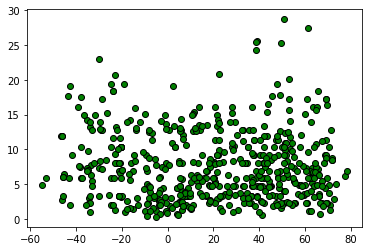

In [10]:
#Create a scatter plot, comparing Lat(x_axis) and Wind Speed (y_axis)
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "green", edgecolor = "black")

plt.savefig("Images/City_Latitude_VS_WindSpeed.png")

## Linear Regression

### Write linear regression plot function (optional)

In [11]:
#Split the weather_df into two dataframes 
#northern and southern hemisphere
northernHemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southernHemisphere = weather_df.loc[weather_df["Lat"] < 0]

print(northernHemisphere.head())
print(southernHemisphere.head())

          City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0  Zaozyornoye           0      UA  1603247396        57  45.16   33.28   
3       Barrow          90      US  1603246997        86  71.29 -156.79   
5    Thinadhoo         100      MV  1603247216        81   0.53   72.93   
6      Qaanaaq          37      GL  1603246991        82  77.48  -69.36   
7    Hong Kong          55      HK  1603247199        67  22.29  114.16   

   Max Temp  Wind Speed  
0     51.89        8.52  
3     28.40       12.75  
5     81.81       12.77  
6     20.41        6.17  
7     77.00        3.00  
            City  Cloudiness Country        Date  Humidity    Lat     Lng  \
1        Ushuaia          40      AR  1603247225        75 -54.80  -68.30   
2  Mar del Plata           0      AR  1603247273        87 -38.00  -57.56   
4        Rikitea          24      PF  1603247226        75 -23.12 -134.97   
8   Punta Arenas          75      CL  1603246980        75 -53.15  -70.92   
9   Puer

In [44]:
#Define LinearAgression function for use in later scatter plots

#Function to print out line graph, representing the Linear Regression
def plotLineGraph(x,y,equation):
    plt.plot(x,y,"r")
    plt.annotate(equation,(0,20),fontsize = 20, color = "red")

#Function to print out the scatter plot of the data being compared
def plotScatterGraph(x,y):
    plt.scatter(x,y)

#Function to calculate Linear Regression and call the plot functions to ouput the graphs
def linearAgression(x,y):
    print(f"r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (mslope, bintercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    linEquation = "y = " + str(round(mslope,2)) + "x + " + str(round(bintercept,2))
    regressValue = (x * mslope) + bintercept
    plotScatterGraph(x,y)
    plotLineGraph(x, regressValue, linEquation)
    return linEquation

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared is : -0.9
y = -0.92x + 91.3


Text(0, 0.5, 'Max Temp')

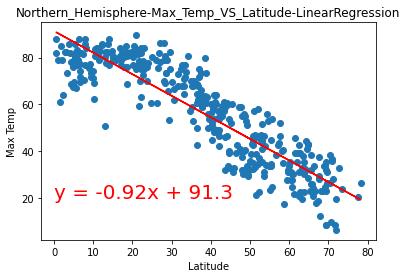

In [46]:
#Create A scatter plot, comparing the Max Temp and Latitude for the Northern Hemisphere
#Call Function to calculate the Linear Agression and output the r-squared value and the graphs
equation = linearAgression(northernHemisphere["Lat"], northernHemisphere["Max Temp"])

#Format the Graph
plt.title("Northern_Hemisphere-Max_Temp_VS_Latitude-LinearRegression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#Save the plot to a png image in the Ima
#plt.savefig("Images/Northern_Hemisphere-Max_Temp_VS_Latitude-LinearRegression")

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression